In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data_Sets/laptop_purchase.csv')

In [6]:
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


## Check for missing values

In [23]:
df.isnull().sum()

Customer_ID            0
Age                    0
Gender                 0
City                   0
Income_Level           0
Purchase_Mode          0
Brand_Purchased        0
Price_Range            0
Payment_Mode           0
Purchase_Frequency     0
Satisfaction_Rating    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   City                 5000 non-null   object
 4   Income_Level         5000 non-null   object
 5   Purchase_Mode        5000 non-null   object
 6   Brand_Purchased      5000 non-null   object
 7   Price_Range          5000 non-null   object
 8   Payment_Mode         5000 non-null   object
 9   Purchase_Frequency   5000 non-null   object
 10  Satisfaction_Rating  5000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [28]:
df.shape

(5000, 11)

## Checking for duplicate values

In [39]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Checking outliers

In [44]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object','category']).columns

print(numeric_columns)
print(categorical_columns)


Index(['Age', 'Satisfaction_Rating'], dtype='object')
Index(['Customer_ID', 'Gender', 'City', 'Income_Level', 'Purchase_Mode',
       'Brand_Purchased', 'Price_Range', 'Payment_Mode', 'Purchase_Frequency'],
      dtype='object')


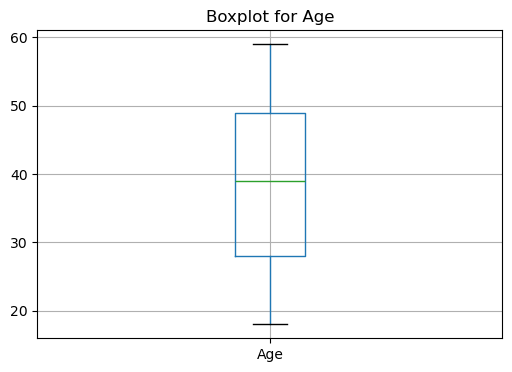

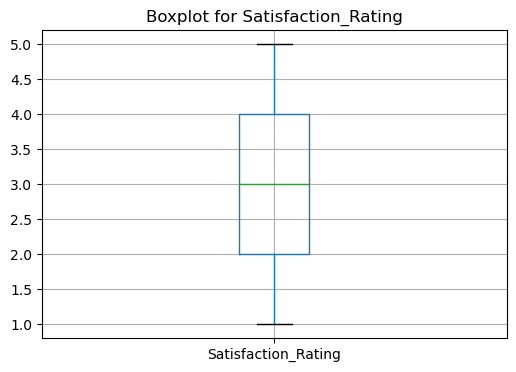

In [46]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Check DataType

In [55]:
df.dtypes

Customer_ID            object
Age                     int64
Gender                 object
City                   object
Income_Level           object
Purchase_Mode          object
Brand_Purchased        object
Price_Range            object
Payment_Mode           object
Purchase_Frequency     object
Satisfaction_Rating     int64
dtype: object

In [61]:
print(df['Age'])

0       56
1       46
2       32
3       25
4       38
        ..
4995    32
4996    36
4997    52
4998    34
4999    52
Name: Age, Length: 5000, dtype: int64


## Checking for Data Inconsistencies

In [64]:
print(df['Age'].unique())

[56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22 30 49]


In [66]:
print(df['Gender'].unique())

['Male' 'Female']


## Checking Price range column in numerical or categorical

In [69]:
df['Price_Range'].dtype

dtype('O')

In [77]:
df['Price_Range'].value_counts()

Price_Range
30K-50K       1768
50K-80K       1498
Below 30K      777
80K-1.2L       729
Above 1.2L     228
Name: count, dtype: int64

In [79]:
encoded_data = pd.get_dummies(df,columns=['Price_Range'])
print('Encoded Data:')
print(encoded_data.head())

Encoded Data:
  Customer_ID  Age  Gender       City Income_Level Purchase_Mode  \
0   CUST00001   56    Male       Pune          Low        Online   
1   CUST00002   46  Female    Kolkata       Medium        Online   
2   CUST00003   32    Male  Bangalore          Low        Online   
3   CUST00004   25  Female     Jaipur       Medium       Offline   
4   CUST00005   38  Female       Pune         High        Online   

  Brand_Purchased Payment_Mode Purchase_Frequency  Satisfaction_Rating  \
0            Dell          UPI               Rare                    4   
1             MSI         Cash         Occasional                    2   
2         Samsung          UPI         Occasional                    3   
3         Samsung  Credit Card               Rare                    4   
4             MSI         Cash               Rare                    3   

   Price_Range_30K-50K  Price_Range_50K-80K  Price_Range_80K-1.2L  \
0                 True                False                 Fal

## Purchase Frequency

In [84]:
df['Purchase_Frequency'].unique()

array(['Rare', 'Occasional', 'Frequent'], dtype=object)

## Skewness

In [87]:
skewness_age = df['Age'].skew()
print(f"Skewness of Age: {skewness_age}")

Skewness of Age: -0.02983117302667299


## Histogram

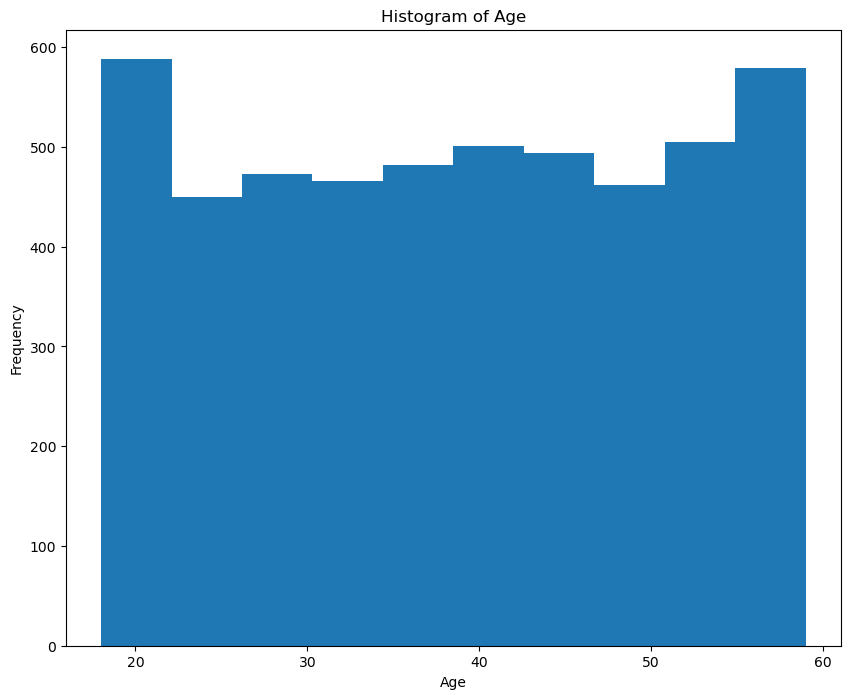

In [90]:
plt.figure(figsize=(10,8))
plt.hist(df['Age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()